In [16]:
import qubic.pygsti.qupig as qupig
import qubic.pygsti.pygsti_rb as pygsti_rb
from importlib import reload
import pygsti
import qubic.job_manager_jpm as job_manager
from pygsti.models import modelconstruction as _mc

In [17]:
reload(pygsti_rb)
reload(qupig)
reload(job_manager)

<module 'qubic.job_manager_jpm' from '/home/jpmarceaux/software/qubic/job_manager_jpm.py'>

In [18]:
# make the processor spec
register = ['Q1'] # these correspond to the actual qubit id's on the qubic device
gate_names = ['Gxpi2', 'Gzpi2']

availability = {
    'Gxpi2': [(qid, ) for qid in register],
    'Gzpi2': [(qid, ) for qid in register],
}

pspec = pygsti.processors.QubitProcessorSpec(num_qubits=len(register), gate_names=gate_names,
                                 availability=availability, qubit_labels=register)


In [19]:
# make a pygsti simulation manager
model = _mc.create_explicit_model(pspec)
model.set_all_parameterizations('TP')
model = model.depolarize(0.01)
sim_manager = job_manager.SimulationManager(model)


In [20]:
crb = pygsti_rb.CliffordRB(pspec, depths=[0, 1, 2, 4, 8, 16, 32, 64])

- Sampling 10 circuits at CRB length 0 (1 of 8 depths) with seed 601530
- Sampling 10 circuits at CRB length 1 (2 of 8 depths) with seed 601540
- Sampling 10 circuits at CRB length 2 (3 of 8 depths) with seed 601550
- Sampling 10 circuits at CRB length 4 (4 of 8 depths) with seed 601560
- Sampling 10 circuits at CRB length 8 (5 of 8 depths) with seed 601570
- Sampling 10 circuits at CRB length 16 (6 of 8 depths) with seed 601580
- Sampling 10 circuits at CRB length 32 (7 of 8 depths) with seed 601590
- Sampling 10 circuits at CRB length 64 (8 of 8 depths) with seed 601600


In [21]:
crb.collect_dataset(sim_manager, 1000, qchip=None)

/home/jpmarceaux/pyGSTi/pygsti/layouts/evaltree.py:183: UserWarning: Created an evaluation tree that is inefficient: tree-size > 10 * #circuits !
This is likely due to the fact that the circuits being simulated do not have a
periodic structure. Consider using a different forward simulator (e.g. MapForwardSimulator).
  _warnings.warn(("Created an evaluation tree that is inefficient: tree-size > %d * #circuits !\n"


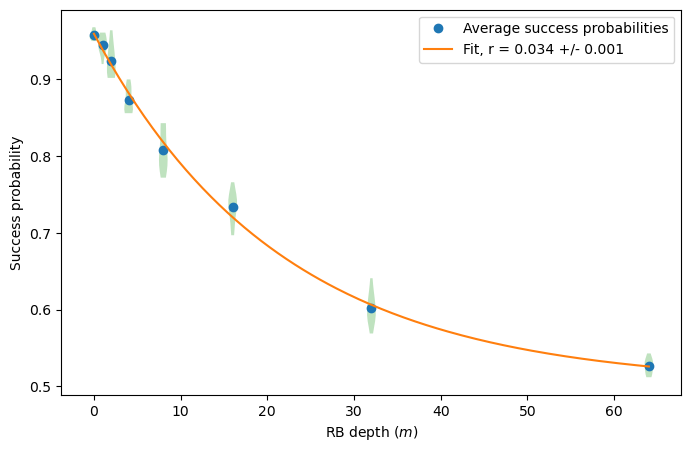

In [21]:
crb.make_report()